In [1]:
import cv2
import numpy as np
from scipy.stats import skew

In [2]:
# --- Load image ---
image_path = "Preprocessed_Data/24 hr/pH6 Hydrolytic/cropped_24hr_pH6_W13.JPG"  
image = cv2.imread(image_path)

(np.float64(-0.5), np.float64(255.5), np.float64(255.5), np.float64(-0.5))

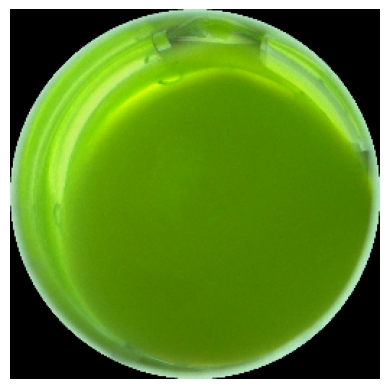

In [3]:
image = cv2.resize(image, (256, 256))  # Resize for consistency

# Show the resized image using matplotlib
import matplotlib.pyplot as plt
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')  # Hide axis

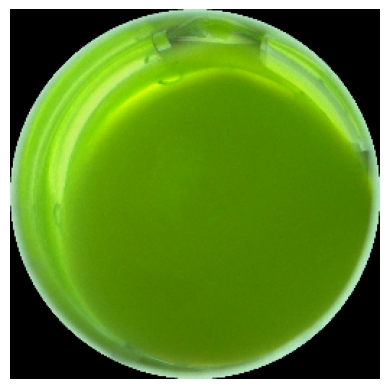

In [4]:
rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Show the RGB image using matplotlib
plt.imshow(rgb_image)
plt.axis('off')  # Hide axes
plt.show()

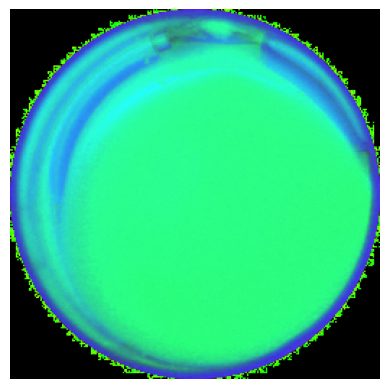

In [5]:
hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# Show the HSV image using matplotlib
plt.imshow(hsv_image)   
plt.axis('off')  # Hide axes
plt.show()


--- RGB Histogram Shape: (768,)


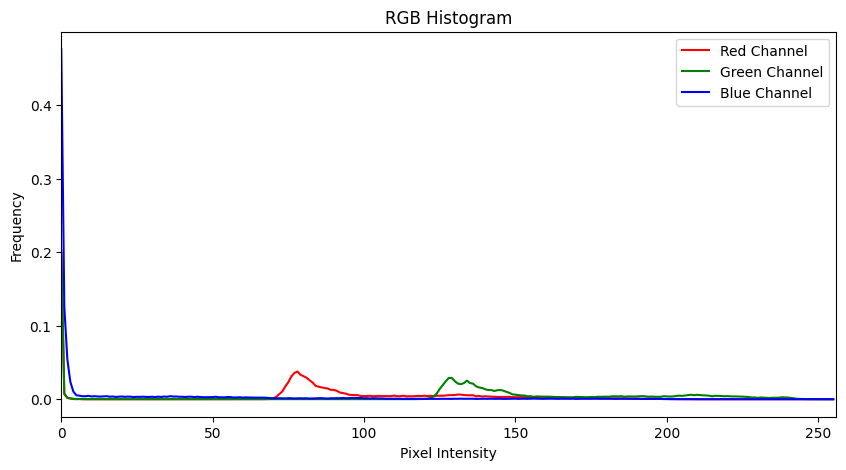

In [6]:
# --- 1. RGB Histogram ---
rgb_hist = []
for i in range(3):  # R, G, B channels
    hist = cv2.calcHist([rgb_image], [i], None, [256], [0, 256])
    hist = hist.flatten() / np.sum(hist)  # Normalize
    rgb_hist.extend(hist)

print("\n--- RGB Histogram Shape:", np.array(rgb_hist).shape)
# Plot the RGB histogram
plt.figure(figsize=(10, 5))
plt.title("RGB Histogram")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.xlim([0, 256])
plt.plot(np.arange(256), rgb_hist[:256], color='r', label='Red Channel')
plt.plot(np.arange(256), rgb_hist[256:512], color='g', label='Green Channel')
plt.plot(np.arange(256), rgb_hist[512:], color='b', label='Blue Channel')
plt.legend()
plt.show()

--- HSV Histogram Shape: (692,)


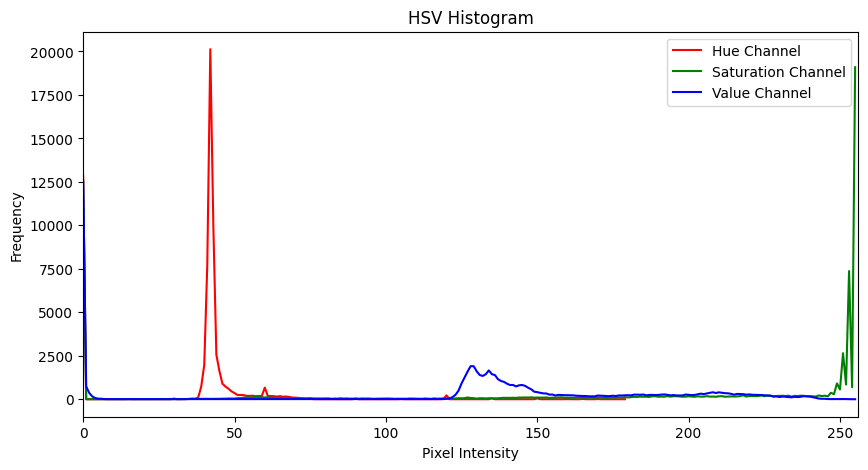

In [7]:
# --- 2. HSV Histogram ---
hsv_hist = []
# H: 180 bins, S & V: 256 bins (OpenCV ranges)
h_bins = cv2.calcHist([hsv_image], [0], None, [180], [0, 180]).flatten()
s_bins = cv2.calcHist([hsv_image], [1], None, [256], [0, 256]).flatten()
v_bins = cv2.calcHist([hsv_image], [2], None, [256], [0, 256]).flatten()

hsv_hist = np.concatenate([h_bins, s_bins, v_bins])  # Combine histograms into one array
print("--- HSV Histogram Shape:", hsv_hist.shape)

# Plot the HSV histogram
plt.figure(figsize=(10, 5))
plt.title("HSV Histogram")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency") 
plt.xlim([0, 256])
plt.plot(np.arange(180), h_bins, color='r', label='Hue Channel')  # Use red for Hue
plt.plot(np.arange(256), s_bins, color='g', label='Saturation Channel')  # Use green for Saturation
plt.plot(np.arange(256), v_bins, color='b', label='Value Channel')  # Use blue for Value
plt.legend()
plt.show()

In [8]:
# Normalize
hsv_hist = np.concatenate([h_bins, s_bins, v_bins])
hsv_hist = hsv_hist / np.sum(hsv_hist)

--- Color Moments (R, G, B) ---
Mean:      [ 81.09594727 126.01141357  20.03239441]
Std Dev:   [50.13948207 72.36430546 40.42089016]
Skewness:  [-0.25360377 -0.71391785  2.48022686]


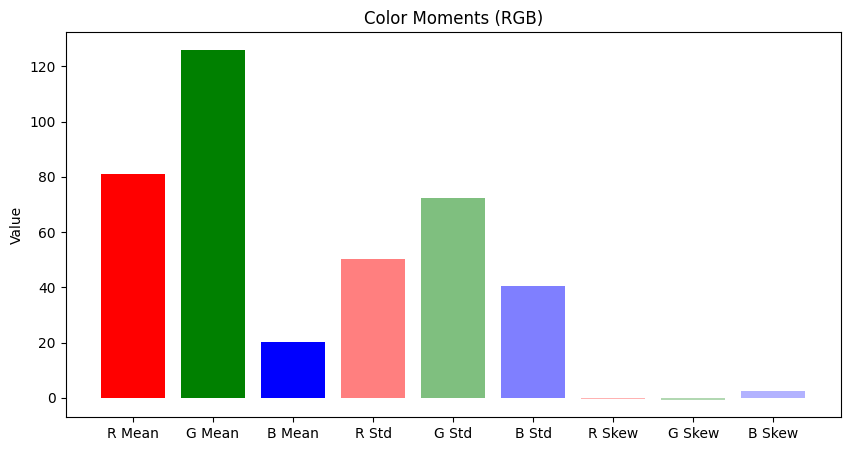

In [9]:
# --- 3. Color Moments (RGB) ---
mean = np.mean(rgb_image, axis=(0, 1))         # Mean for R, G, B
std = np.std(rgb_image, axis=(0, 1))           # Standard deviation
skw = skew(rgb_image.reshape(-1, 3), axis=0)   # Skewness per channel

color_moments = np.concatenate([mean, std, skw])

print("--- Color Moments (R, G, B) ---")
print("Mean:     ", mean)
print("Std Dev:  ", std)
print("Skewness: ", skw)

# Plot the color moments
plt.figure(figsize=(10, 5))
plt.title("Color Moments (RGB)")
plt.bar(['R Mean', 'G Mean', 'B Mean'], mean, color=['r', 'g', 'b'])
plt.bar(['R Std', 'G Std', 'B Std'], std, color=['r', 'g', 'b'], alpha=0.5)
plt.bar(['R Skew', 'G Skew', 'B Skew'], skw, color=['r', 'g', 'b'], alpha=0.3)
plt.ylabel("Value")
plt.show()

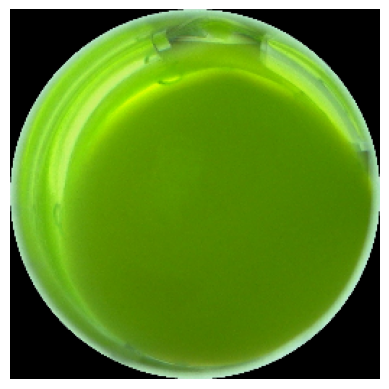

In [10]:
# Normalization of the image

normalized_image = cv2.normalize(image, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX)
# Show the normalized image using matplotlib
plt.imshow(cv2.cvtColor(normalized_image, cv2.COLOR_BGR2RGB))   
plt.axis('off')  # Hide axes
plt.show()

In [12]:
import cv2
import numpy as np
import os

# --- 1. Feature Extraction Function ---
def extract_features(image):
    # Convert to HSV
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    # HSV Histogram (8 bins each)
    hist_h = cv2.calcHist([hsv], [0], None, [8], [0, 180])
    hist_s = cv2.calcHist([hsv], [1], None, [8], [0, 256])
    hist_v = cv2.calcHist([hsv], [2], None, [8], [0, 256])
    hist = np.concatenate([hist_h, hist_s, hist_v]).flatten()

    # Normalize histogram
    hist /= np.sum(hist)

    # RGB Color Moments
    mean = np.mean(image, axis=(0, 1))
    std = np.std(image, axis=(0, 1))
    skewness = np.mean(((image - mean) / (std + 1e-6)) ** 3, axis=(0, 1))

    moments = np.concatenate([mean, std, skewness])

    # Combine histogram and moments
    return np.concatenate([hist, moments])

# --- 2. Load a single image ---
image_path = "Preprocessed_Data/24 hr/pH6 Hydrolytic/cropped_24hr_pH6_W13.JPG"  
image = cv2.imread(image_path)
image = cv2.resize(image, (64, 64))

# --- 3. Extract features ---
features = extract_features(image)

# --- 4. Print output ---
print("Extracted Feature Vector Shape:", features.shape)
print("Feature Vector:\n", features)


Extracted Feature Vector Shape: (33,)
Feature Vector:
 [ 6.47786483e-02  2.19807938e-01  4.45963554e-02  2.60416674e-03
  8.13802108e-05  8.13802064e-04  5.69661439e-04  8.13802108e-05
  6.36393204e-02  1.00911455e-02  7.48697901e-03  6.10351562e-03
  1.26139326e-02  1.82291660e-02  2.63671875e-02  1.88802078e-01
  7.03938827e-02  4.06901032e-04  3.25520843e-04  2.47395840e-02
  1.39729813e-01  3.54003906e-02  4.65494804e-02  1.57877598e-02
  2.02111816e+01  1.26249756e+02  8.12626953e+01  4.05960003e+01
  7.22274908e+01  5.00706418e+01  2.46428287e+00 -7.18388789e-01
 -2.58566925e-01]


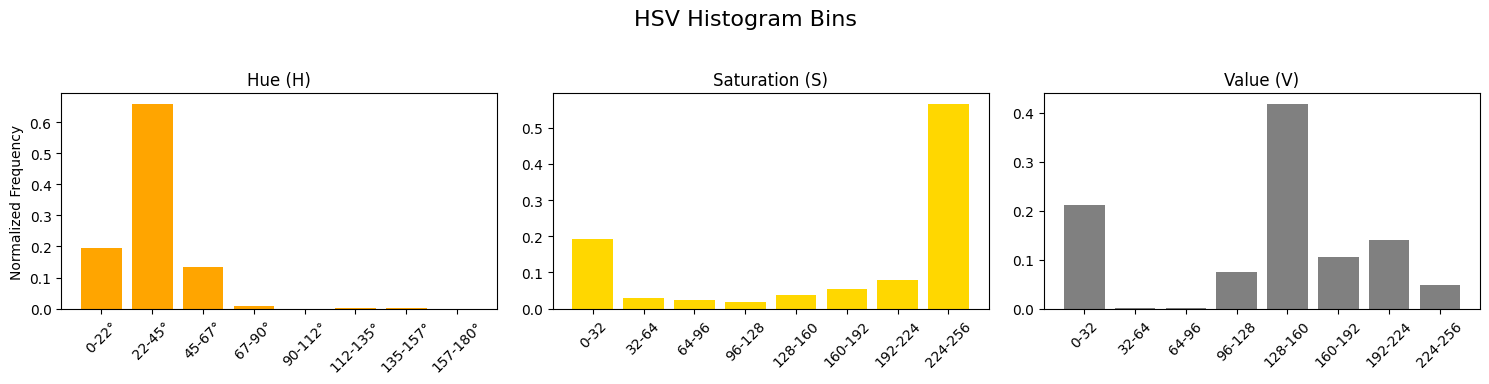

In [14]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# --- Load image ---
image_path = "Preprocessed_Data/24 hr/pH6 Hydrolytic/cropped_24hr_pH6_W13.JPG"
image = cv2.imread(image_path)
image = cv2.resize(image, (64, 64))

# --- Convert to HSV and compute histograms ---
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# Compute histograms with 8 bins each
hist_h = cv2.calcHist([hsv], [0], None, [8], [0, 180]).flatten()
hist_s = cv2.calcHist([hsv], [1], None, [8], [0, 256]).flatten()
hist_v = cv2.calcHist([hsv], [2], None, [8], [0, 256]).flatten()

# Normalize
hist_h /= np.sum(hist_h)
hist_s /= np.sum(hist_s)
hist_v /= np.sum(hist_v)

# --- Plotting ---
bin_labels_h = [f"{int(i)}-{int(i+22.5)}°" for i in np.arange(0, 180, 22.5)]
bin_labels_sv = [f"{int(i)}-{int(i+32)}" for i in np.arange(0, 256, 32)]

fig, axs = plt.subplots(1, 3, figsize=(15, 4))
plt.suptitle("HSV Histogram Bins", fontsize=16)

# Hue plot
axs[0].bar(bin_labels_h, hist_h, color='orange')
axs[0].set_title("Hue (H)")
axs[0].set_ylabel("Normalized Frequency")
axs[0].tick_params(axis='x', rotation=45)

# Saturation plot
axs[1].bar(bin_labels_sv, hist_s, color='gold')
axs[1].set_title("Saturation (S)")
axs[1].tick_params(axis='x', rotation=45)

# Value plot
axs[2].bar(bin_labels_sv, hist_v, color='gray')
axs[2].set_title("Value (V)")
axs[2].tick_params(axis='x', rotation=45)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


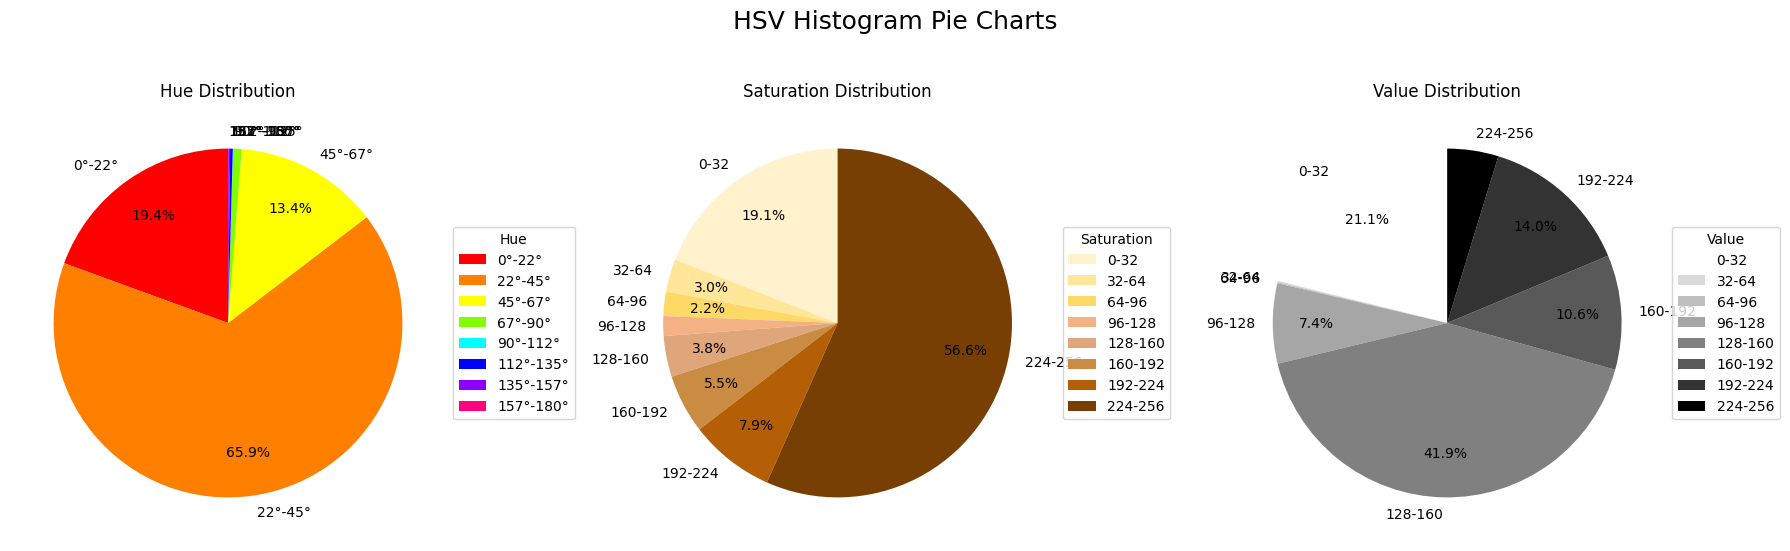

In [16]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# --- Load and preprocess image ---
image_path = "Preprocessed_Data/24 hr/pH6 Hydrolytic/cropped_24hr_pH6_W13.JPG"
image = cv2.imread(image_path)
image = cv2.resize(image, (64, 64))
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# --- Compute histograms ---
hist_h = cv2.calcHist([hsv], [0], None, [8], [0, 180]).flatten()
hist_s = cv2.calcHist([hsv], [1], None, [8], [0, 256]).flatten()
hist_v = cv2.calcHist([hsv], [2], None, [8], [0, 256]).flatten()

# Normalize histograms
hist_h /= np.sum(hist_h)
hist_s /= np.sum(hist_s)
hist_v /= np.sum(hist_v)

# --- Labels and colors ---
h_labels = [f'{int(i)}°-{int(i+22.5)}°' for i in np.arange(0, 180, 22.5)]
sv_labels = [f'{int(i)}-{int(i+32)}' for i in np.arange(0, 256, 32)]

h_colors = ['#FF0000', '#FF7F00', '#FFFF00', '#7FFF00', '#00FFFF', '#0000FF', '#8B00FF', '#FF007F']
s_colors = ['#FFF2CC', '#FFE699', '#FFD966', '#F4B183', '#DFA67B', '#C98C42', '#B45F06', '#783F04']
v_colors = ['#FFFFFF', '#D9D9D9', '#BFBFBF', '#A6A6A6', '#808080', '#595959', '#333333', '#000000']

# --- Function to skip labels < threshold ---
def autopct_generator(threshold=2.0):
    def inner_autopct(pct):
        return f'{pct:.1f}%' if pct > threshold else ''
    return inner_autopct

# --- Plotting ---
fig, axs = plt.subplots(1, 3, figsize=(18, 6))
plt.suptitle('HSV Histogram Pie Charts', fontsize=18)

# Hue Pie
wedges_h, _, _ = axs[0].pie(
    hist_h, labels=h_labels, colors=h_colors, startangle=90,
    autopct=autopct_generator(2.0), labeldistance=1.1, pctdistance=0.75
)
axs[0].set_title('Hue Distribution')
axs[0].legend(wedges_h, h_labels, title="Hue", loc="center left", bbox_to_anchor=(1, 0.5))

# Saturation Pie
wedges_s, _, _ = axs[1].pie(
    hist_s, labels=sv_labels, colors=s_colors, startangle=90,
    autopct=autopct_generator(2.0), labeldistance=1.1, pctdistance=0.75
)
axs[1].set_title('Saturation Distribution')
axs[1].legend(wedges_s, sv_labels, title="Saturation", loc="center left", bbox_to_anchor=(1, 0.5))

# Value Pie
wedges_v, _, _ = axs[2].pie(
    hist_v, labels=sv_labels, colors=v_colors, startangle=90,
    autopct=autopct_generator(2.0), labeldistance=1.1, pctdistance=0.75
)
axs[2].set_title('Value Distribution')
axs[2].legend(wedges_v, sv_labels, title="Value", loc="center left", bbox_to_anchor=(1, 0.5))

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


In [2]:
import os
import shutil
from pathlib import Path
import random

# Set seed for reproducibility
random.seed(42)

# Paths
input_dir = Path("Preprocessed_Data")
output_base = Path("Split_Data")  # Destination folder for splits

# Step 1: Get all well IDs from all folders
all_wells = set()

for time_point in input_dir.iterdir():
    if not time_point.is_dir():
        continue
    for ph_dir in time_point.iterdir():
        if not ph_dir.is_dir():
            continue
        for image_file in ph_dir.glob("*.JPG"):
            filename = image_file.name
            # Assumes well ID is after the last underscore before .JPG
            well_id = filename.split("_")[-1].split(".")[0]
            all_wells.add(well_id)

# Step 2: Create well-wise split
all_wells = sorted(list(all_wells))
random.shuffle(all_wells)

n = len(all_wells)
train_wells = set(all_wells[:int(0.6 * n)])
val_wells   = set(all_wells[int(0.6 * n):int(0.8 * n)])
test_wells  = set(all_wells[int(0.8 * n):])

# Step 3: Copy images to appropriate folders based on well
for time_point in input_dir.iterdir():
    if not time_point.is_dir():
        continue
    for ph_dir in time_point.iterdir():
        if not ph_dir.is_dir():
            continue
        for image_file in ph_dir.glob("*.JPG"):
            filename = image_file.name
            well_id = filename.split("_")[-1].split(".")[0]

            if well_id in train_wells:
                split = "train"
            elif well_id in val_wells:
                split = "val"
            elif well_id in test_wells:
                split = "test"
            else:
                continue  # In case well ID was somehow missed

            # Target path: /Split_Data/train/0 hr/pH5 Hydrolytic
            rel_path = image_file.relative_to(input_dir)
            target_path = output_base / split / rel_path.parent
            target_path.mkdir(parents=True, exist_ok=True)
            shutil.copy(image_file, target_path / filename)
